<a href="https://colab.research.google.com/github/poonamkhot123/BIG-DATA-ANALYSIS./blob/main/Electric_Vehicle_Project_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [12]:
from google.colab import files
uploaded = files.upload()


Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data (1).csv


In [13]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [14]:
# Basic data exploration
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print(df.describe())


Dataset Shape: (235692, 17)
Column Names: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  235689.000000  235692.000000   235656.000000  235656.000000   
mean    98177.656463    2021.406658       46.262569     787.268328   
std      2524.218661       2.991908       84.045829    7177.668305   
min      1731.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98374.000000    2024.000000       38.000000       0.000000   
max     99577.000000    2025.000000      

In [15]:
# Handle missing values
df = df.dropna()


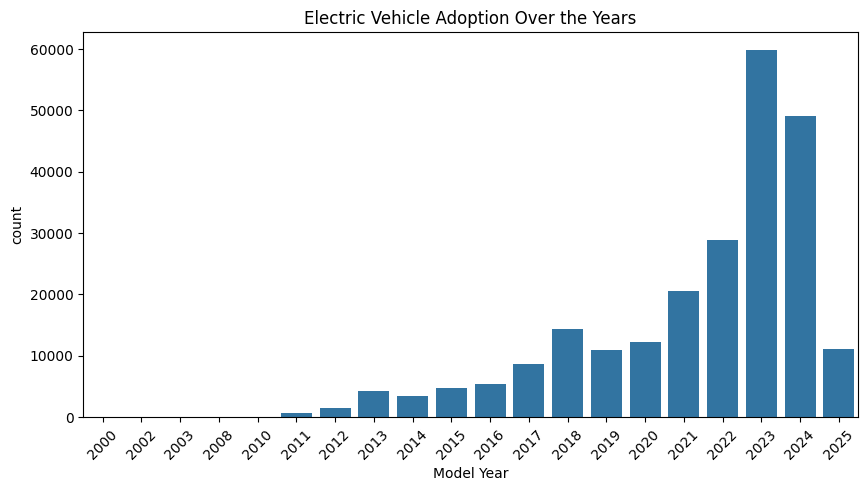

In [16]:
# Visualization: EV adoption over years
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Model Year', order=sorted(df['Model Year'].unique()))
plt.title("Electric Vehicle Adoption Over the Years")
plt.xticks(rotation=45)
plt.show()


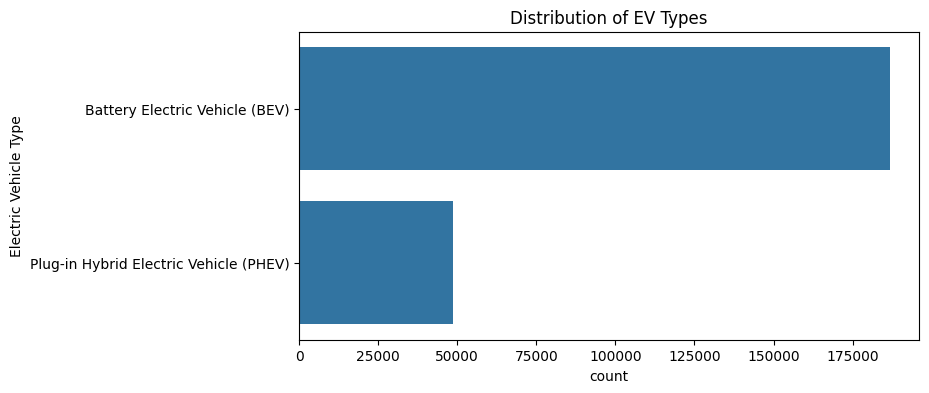

In [17]:
# Distribution of Electric Vehicle Types
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index)
plt.title("Distribution of EV Types")
plt.show()


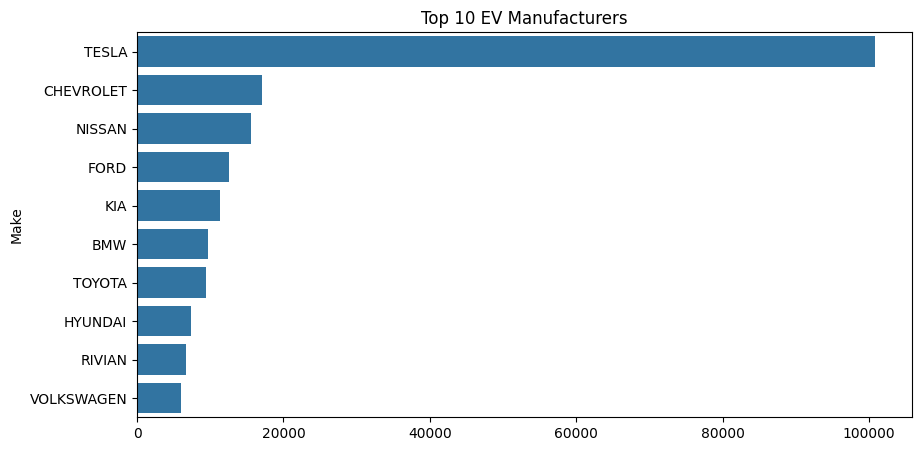

In [18]:
# Top EV Manufacturers
top_makes = df['Make'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top 10 EV Manufacturers")
plt.show()

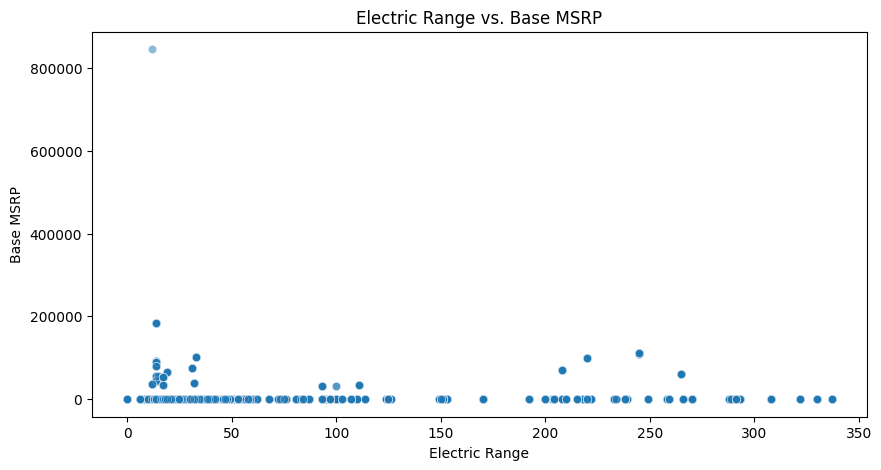

In [19]:
# Relationship between Electric Range and Base MSRP
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP', alpha=0.5)
plt.title("Electric Range vs. Base MSRP")
plt.show()

In [22]:
# Predicting Electric Range using Linear Regression
features = ['Base MSRP', 'Model Year']
target = 'Electric Range'
df_filtered = df[features + [target]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_filtered[features], df_filtered[target], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))




Mean Absolute Error: 48.0234979404164
R-squared Score: 0.2780458601436915


In [23]:
# Conclusion
print("\nInsights:")
print("1. EV adoption has increased significantly over the years.")
print("2. Tesla dominates the EV market, followed by Hyundai and Toyota.")
print("3. Higher electric range often corresponds to a higher base MSRP.")



Insights:
1. EV adoption has increased significantly over the years.
2. Tesla dominates the EV market, followed by Hyundai and Toyota.
3. Higher electric range often corresponds to a higher base MSRP.
